In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

 Title: Alcohol Consumption and Regions: An Investigation

Intro

Alcohol consumption is oftentimes involved in activities as a form of bonding and to facilitate socialization, moreover, it can be a part of one's culture. For example, there are "wet cultures" where alcohol is common in everyday life, which are in European countries around the Mediterranean and "consumed with meals", with lower rates of abstinence. Or, there are "dry cultures" where alcohol is uncommon with higher rates of abstinence, such as Canada(Bloomfield et al., 2003). The differences of alcohol in countries have been showed in studies previously. For example, a study found that German respondents had an alcohol consumption that was twice as high as US respondents (Bloomfield et al., 2003)

It is important to note that excessive consumption of alcohol is linked to many negative health outcomes. It may lead to crimes, road incidents, diseases and health impacts (Ritchie et al., 2018). Alcohol can cause addiction, and after drinking alcohol the effects can persist for hours (Babor et al., 2010). A European longitudinal study also demonstrated that job loss had a positive association with hazardous drinking over the span of 6 years (Bosque-Prous et al., 2015). Thus, one can see the substantial impacts of alcohol consumption on populations.

Our analysis uses data, "Happiness and Alcohol Consumption" found on Kaggle.com and will seek to answer the following question: Given the beer, and wine per capita, what regions are would most likely have those consumption per capita?  In this analysis, this expansive dataset was collected by Marcos Pessotto. In our dataset, we will be using the variables: “Region”, “Beer_PerCapita” and “Wine_PerCapita”. For our project, we hypothesize that the higher the beer and wine consumption per capita, it will most likely to be located on the Western Europe region as Western Europe regions borders the Mediterranean, where "wet culture" is prevalent(Bloomfield et al., 2003). 

To begin analyzing our data, we first loaded in all the packages we needed using the 'library' function.
Our dataset is taken from Kaggle. 

First, we had to download the dataset from the web onto the computer. Second, we uploaded the file into the juypter directory we are working in.
Next, we set the seed to ensure that the sequence of numbers that is randomly generated is reproducible and we read in the data using the 'read_csv' function with a relative pathway. Below is the data that was read. 

In [3]:
set.seed(20)

alcohol_data <- read_csv("HappinessAlcoholConsumption.csv")
alcohol_data

Parsed with column specification:
cols(
  Country = col_character(),
  Region = col_character(),
  Hemisphere = col_character(),
  HappinessScore = col_double(),
  HDI = col_double(),
  GDP_PerCapita = col_double(),
  Beer_PerCapita = col_double(),
  Spirit_PerCapita = col_double(),
  Wine_PerCapita = col_double()
)



Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Denmark,Western Europe,north,7.526,928,53.579,224,81,278
Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
Iceland,Western Europe,north,7.501,933,60.530,233,61,78
Norway,Western Europe,north,7.498,951,70.890,169,71,129
Finland,Western Europe,north,7.413,918,43.433,263,133,97
Canada,North America,north,7.404,922,42.349,240,122,100
Netherlands,Western Europe,north,7.339,928,45.638,251,88,190
New Zealand,Australia and New Zealand,south,7.334,915,40.332,203,79,175
Australia,Australia and New Zealand,south,7.313,938,49.897,261,72,212


Doing a quick analysis of the data reveals that there are 9 variables. The dataset is pretty tidy - each row is one observation - an observation of one specific country and its region, and its respective elements such as HappinessScore, HDI, GDP per capita etc. 
For our specific question, we did not need to consider all the columns in this dataset, so we selected region, Beer_PerCapita and Wine_PerCapita.

We grouped the dataset by region to tell which regions there are for when plotting it in the graph, as we want to colour by regions and label which regions there are.

In [4]:
data_grouped <- alcohol_data %>%
                group_by(Region) %>%
                summarize()
data_grouped

`summarise()` ungrouping output (override with `.groups` argument)



Region
<chr>
Australia and New Zealand
Central and Eastern Europe
Eastern Asia
Latin America and Caribbean
Middle East and Northern Africa
North America
Southeastern Asia
Sub-Saharan Africa
Western Europe


And then we selected the columns that we would be using for our predictors as well as the target variable.

In [5]:
data_selected2 <- alcohol_data %>%
                 select(Region, Beer_PerCapita, Wine_PerCapita)

data_selected2

Region,Beer_PerCapita,Wine_PerCapita
<chr>,<dbl>,<dbl>
Western Europe,224,278
Western Europe,185,280
Western Europe,233,78
Western Europe,169,129
Western Europe,263,97
North America,240,100
Western Europe,251,190
Australia and New Zealand,203,175
Australia and New Zealand,261,212


Now we split our data into 75% and 25% in order to extract the training and testing data into two separate frames, and we show the training dataset below.

In [6]:
alcoholdata_split<- initial_split(data_selected2, prop = 0.75, strata = Region)
alcohol_train <- training(alcoholdata_split)
alcohol_test <- testing(alcoholdata_split)

alcohol_train

Region,Beer_PerCapita,Wine_PerCapita
<chr>,<dbl>,<dbl>
Western Europe,224,278
Western Europe,185,280
Western Europe,233,78
Western Europe,169,129
North America,240,100
Western Europe,251,190
Australia and New Zealand,203,175
Australia and New Zealand,261,212
Western Europe,152,186


We then grouped the regions and showed the number of observations of each region.

In [7]:
data_summary <- alcohol_train %>%
            group_by(Region) %>%
            summarize(n = n())
data_summary

`summarise()` ungrouping output (override with `.groups` argument)



Region,n
<chr>,<int>
Australia and New Zealand,2
Central and Eastern Europe,21
Eastern Asia,2
Latin America and Caribbean,17
Middle East and Northern Africa,9
North America,1
Southeastern Asia,5
Sub-Saharan Africa,22
Western Europe,15


The bar graph below shows a visualization of this table.

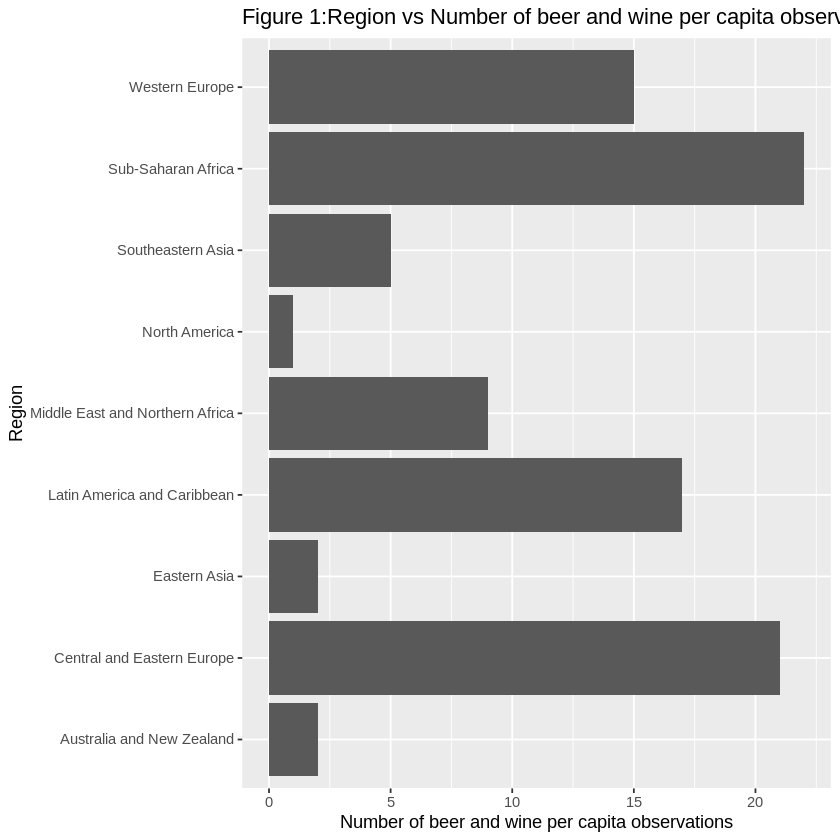

In [8]:
data_summary_graph <- data_summary %>%
                    ggplot(aes(x = n, y = Region)) + 
                    geom_bar(stat = "identity") + 
                    xlab("Number of beer and wine per capita observations") + 
                    ylab("Region") + 
                    ggtitle("Figure 1:Region vs Number of beer and wine per capita observations")


data_summary_graph

We created a scatterplot below to compare the predictor variables we have selected which was Beer per capita and wine per capita.

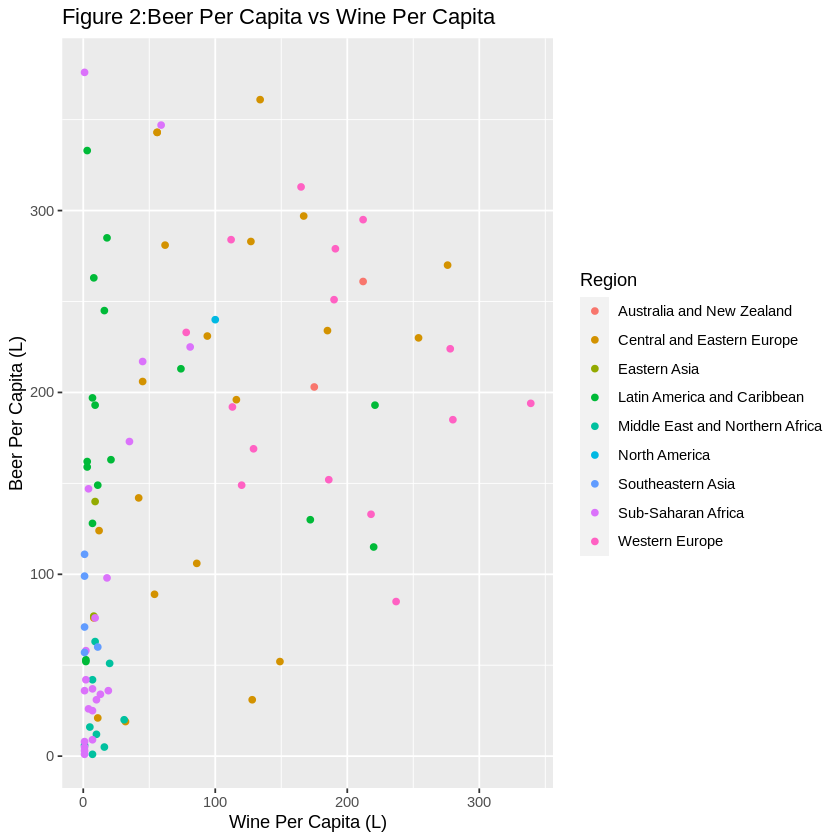

In [9]:
alcohol_training_plot <- alcohol_train %>%
                        ggplot(aes(x = Wine_PerCapita, y = Beer_PerCapita, colour = Region)) +
                        geom_point() +
                        labs(x = "Wine Per Capita (L)", y = "Beer Per Capita (L)", colour = "Region") +
                        ggtitle("Figure 2:Beer Per Capita vs Wine Per Capita")
alcohol_training_plot

Firstly, we balanced the classes of the testing and the training data as they were uneven by installing the themis package above. 

In [10]:
install.packages("themis")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [11]:
library(themis)

ERROR: Error: package or namespace load failed for ‘themis’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘generics’ 0.0.2 is already loaded, but >= 0.1.0 is required


In [11]:

alcohol_training_recipe <- recipe(Region ~ ., data = alcohol_train) %>%
                    step_upsample(Region, over_ratio = 1, skip = FALSE) %>%
                    prep() 

In [12]:
alcohol_show1 <- bake(alcohol_training_recipe, alcohol_train)%>%
                    group_by(Region)%>%
                    summarize(n = n())

alcohol_show1

In [13]:

alcohol_testing_recipe <- recipe(Region ~ ., data = alcohol_test) %>%
                    step_upsample(Region, over_ratio = 1, skip = FALSE) %>%
                    prep()

ERROR: Error: package or namespace load failed for ‘themis’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘generics’ 0.0.2 is already loaded, but >= 0.1.0 is required


In [14]:
alcohol_te_recipe <- bake(alcohol_training_recipe, alcohol_test)
                   

alcohol_te_show <- alcohol_te_recipe %>%
                    group_by(Region) %>%
                    summarize(n = n())

alcohol_te_show

ERROR: Error in bake(alcohol_training_recipe, alcohol_test): object 'alcohol_training_recipe' not found


We will now use R to perform cross validation and choose the best K, and we will create a recipe for preprocessing data, and a model specification for K-nearest neighbors regression.  

In [15]:
alcohol_vfold <- vfold_cv(alcohol_train, v = 10, strata = Region)

We created the recipe using by the training data. 

In [16]:
alco_recipe <- recipe(Region ~ Beer_PerCapita + Wine_PerCapita, data = alcohol_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

Now we made the model with the tune() function 

In [17]:
alco_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")


Now we put everything in a workflow and we will run cross validation for a grid of numbers from 1 to 100 that we created using the tibble. 

In [18]:
alco_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

alco_vals

alco_workflow <- workflow() %>%
                add_recipe(alcohol_training_recipe) %>%
                add_model(alco_spec)%>%
                tune_grid(resamples = alcohol_vfold, grid = alco_vals) %>%
                collect_metrics()

alco_workflow


neighbors
<dbl>
1
6
11
16
21
26
31
36
41


ERROR: Error in is_recipe(recipe): object 'alcohol_training_recipe' not found
